In [18]:
from gammabayes.hyperparameter_likelihood import hyperparameter_likelihood
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import logsumexp
import yaml, pickle
identifier = 'high_res_check_3'

In [19]:
try:
    with open(f'data/{identifier}/hyper_parameter_data.pkl', 'rb') as pickle_file:
            hyper_parameter_data = pickle.load(pickle_file)
except:
    log_posterior = np.load(f'data/{identifier}/log_posterior.npy')
    logmassrange = np.load(f'data/{identifier}/logmassrange.npy')
    xi_range = np.load(f'data/{identifier}/xi_range.npy')

In [20]:
try:
    hyper_instance = hyperparameter_likelihood()
    hyper_instance.initiate_from_dict(hyper_parameter_data)
except:
    pass

/Users/lpin0002/Desktop/temporaryfolder/GammaBayes/gammabayes/hyperparameter_likelihood.py:32: UserWarning: No depedent axes given. Being assigned 'None'.
  warnings.warn("No depedent axes given. Being assigned 'None'.")
/Users/lpin0002/Desktop/temporaryfolder/GammaBayes/gammabayes/hyperparameter_likelihood.py:44: UserWarning: You're not giving me a lot to with?
  warnings.warn("You're not giving me a lot to with?")
/Users/lpin0002/Desktop/temporaryfolder/GammaBayes/gammabayes/hyperparameter_likelihood.py:61: UserWarning: Input dictionary does not contain priors
  warnings.warn("Input dictionary does not contain priors")
/Users/lpin0002/Desktop/temporaryfolder/GammaBayes/gammabayes/hyperparameter_likelihood.py:66: UserWarning: Input dictionary does not contain likelihoods
  warnings.warn("Input dictionary does not contain likelihoods")


0.006987712429686843
0.006540498834186884
0.004192627457812106
0.004583939353874567
0.008720665112249178
0.010677224592561494


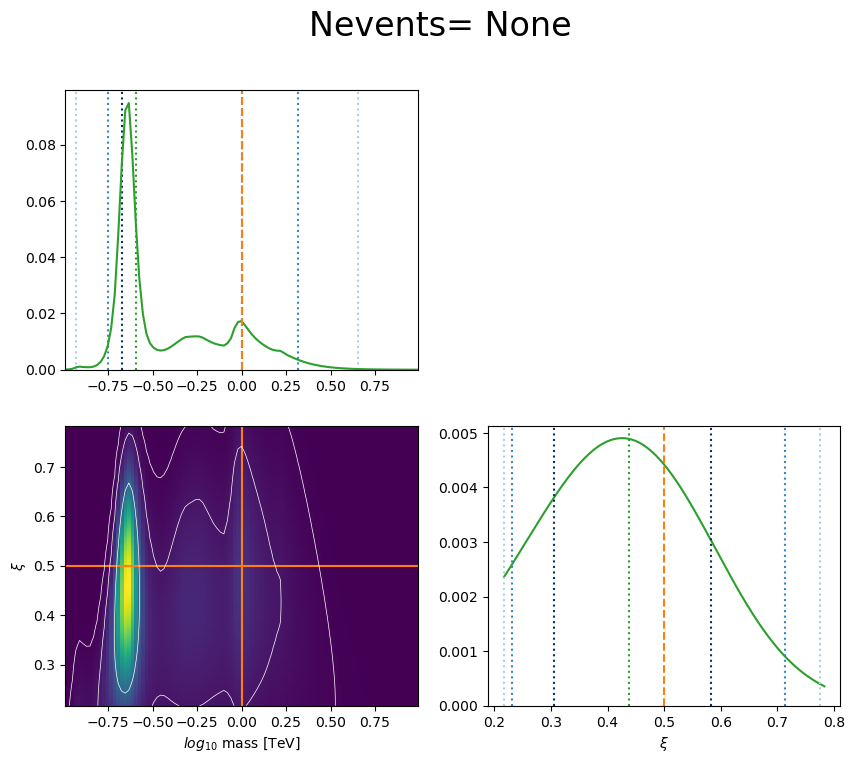

In [17]:
try:
    hyper_instance.plot_posterior(truevals=(0.5, 0.0), saveplot=False)
except:
    plt.figure()
    plt.pcolormesh(logmassrange, xi_range, log_posterior-logsumexp(log_posterior))
    plt.show()

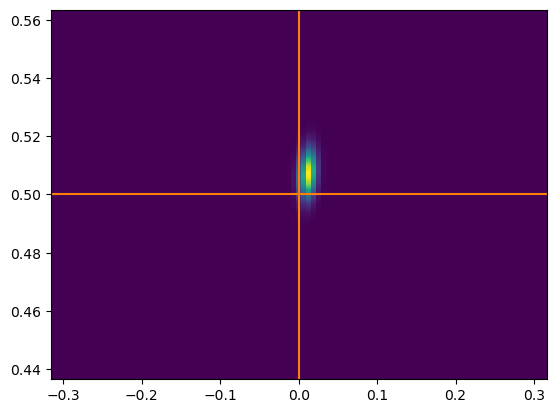

In [24]:
plt.figure()
plt.pcolormesh(logmassrange, xi_range, np.exp(log_posterior-logsumexp(log_posterior)))
plt.axvline(0.0, c='tab:orange')
plt.axhline(0.5, c='tab:orange')
plt.show()